<a href="https://colab.research.google.com/github/Rachanachinthala/rachana_INFO5731_spring2021/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()


openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [3]:
!pip install --upgrade gensim


     |████████████████████████████████| 24.2MB 1.5MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [4]:
import spacy.cli
spacy.cli.download("en")


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [6]:
!pip install pyLDAvis


     |████████████████████████████████| 1.7MB 12.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=3e158ed7a45e361558b754d4327f96112c6a16ad5589390c6ad964b7ac38b2ab
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [7]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [12]:
from google.colab import files
loaded_files = files.upload()


Saving Assignment 6csv.csv to Assignment 6csv.csv


In [14]:
articles_titles = pd.read_csv('Assignment 6csv.csv', encoding = "ISO-8859-1")
articles_titles.head(20)


,Serial Number,headline_text
0,1,Status quo will not be disturbed at Ayodhya; s...
1,2,Fissures in Hurriyat over Pak visit
2,3,America's unwanted heading for India?
3,4,For bigwigs; it is destination Goa
4,5,Extra buses to clear tourist traffic
5,6,Dilute the power of transfers; says Riberio
6,7,Focus shifts to teaching of Hindi
7,8,IT will become compulsory in schools
8,9,Move to stop freedom fighters' pension flayed
9,10,Gilani claims he applied for passport 2 years ago


In [17]:
a = articles_titles['headline_text'].tolist()


In [18]:
words = []
for value in a:
  words.append(gensim.utils.simple_preprocess(str(value), deacc=True))

In [19]:
bigram = gensim.models.Phrases(words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [20]:
#removing stopwords
stopword_removal = [[value for value in simple_preprocess(str(doc)) if value not in stop_words] for doc in words]
bigrams = [bigram_mod[doc] for doc in stopword_removal]


In [22]:
nlp = spacy.load('en', disable=['parser', 'ner'])#lemmatization
postags=['NOUN', 'ADJ', 'VERB', 'ADV']
after_le = []
for sentence in bigrams:
  doc = nlp(" ".join(sentence)) 
  after_le.append([token.lemma_ for token in doc if token.pos_ in postags])

In [25]:
idtoword = corpora.Dictionary(after_le)
texts = after_le
corpus = [idtoword.doc2bow(text) for text in after_lemmatization]
print(corpus[:1])


[[(0, 1), (1, 1)]]


In [27]:
[[(idtoword[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('disturb', 1), ('say', 1)]]

In [32]:
#LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=idtoword,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [35]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 
coherence_model_lda = CoherenceModel(model=lda_model, texts=after_le, dictionary=idtoword, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.082894656348687

Coherence Score:  0.5781923752434854


In [36]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-03-20 02:28:24--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  6.09MB/s    in 2.5s    

2021-03-20 02:28:27 (6.09 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [38]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=idtoword)


In [43]:

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=idtoword)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [45]:
model_list, coherence_values = compute_coherence_values(dictionary=idtoword, corpus=corpus, texts=after_le, start=2, limit=60, step=6)

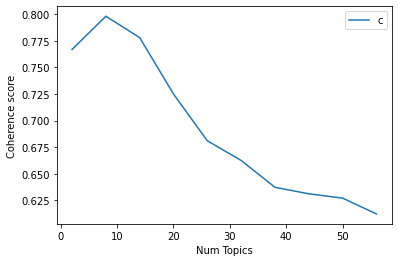

In [46]:
limit=60; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [47]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

Num Topics: 2  - Coherence Value: 0.767
Num Topics: 8  - Coherence Value: 0.7982
Num Topics: 14  - Coherence Value: 0.7781
Num Topics: 20  - Coherence Value: 0.725
Num Topics: 26  - Coherence Value: 0.6811
Num Topics: 32  - Coherence Value: 0.6625
Num Topics: 38  - Coherence Value: 0.6373
Num Topics: 44  - Coherence Value: 0.6312
Num Topics: 50  - Coherence Value: 0.6271
Num Topics: 56  - Coherence Value: 0.6123


In [50]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=idtoword,
                                           num_topics=14, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [51]:
#topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.090*"power" + 0.047*"suffer" + 0.047*"vip" + 0.047*"guest" + '
  '0.047*"house" + 0.047*"supply" + 0.047*"stop" + 0.047*"generation" + '
  '0.047*"rtps" + 0.047*"record"'),
 (1,
  '0.079*"make" + 0.079*"say" + 0.079*"disturb" + 0.041*"education" + '
  '0.041*"movement" + 0.041*"people" + 0.041*"guinness" + 0.041*"die" + '
  '0.041*"undecided" + 0.041*"team"'),
 (2,
  '0.074*"project" + 0.074*"focus" + 0.074*"aiim" + 0.074*"warning" + '
  '0.074*"dismiss" + 0.074*"bigwig" + 0.038*"super" + 0.038*"jumbo" + '
  '0.038*"approach" + 0.038*"watershed"'),
 (3,
  '0.056*"bjp" + 0.056*"statewide" + 0.056*"traffic" + 0.056*"block" + '
  '0.056*"murder" + 0.056*"party" + 0.056*"spoil" + 0.004*"bigwig" + '
  '0.004*"focus" + 0.004*"firm"'),
 (4,
  '0.156*"head" + 0.156*"unwante" + 0.041*"milk" + 0.041*"r" + 0.041*"price" + '
  '0.041*"anti" + 0.041*"hopelessness" + 0.041*"today" + 0.003*"turn" + '
  '0.003*"take"'),
 (5,
  '0.094*"tourist" + 0.094*"bus" + 0.094*"clear" + 0.094*"extra" + 

In [53]:
#visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, idtoword)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.252170  0.060049       1        1  11.882199
8     -0.107043  0.137132       2        1  10.145172
12    -0.033885 -0.203747       3        1   9.773185
13     0.101611 -0.060079       4        1   9.497437
11    -0.062830 -0.074099       5        1   9.425292
6     -0.055274  0.086344       6        1   8.631408
10    -0.023338  0.018022       7        1   6.149476
2     -0.033043  0.035648       8        1   5.979265
1     -0.016170 -0.000539       9        1   5.522977
4     -0.016883  0.003693      10        1   5.416542
0      0.030344  0.011366      11        1   4.959613
9     -0.013247 -0.001538      12        1   4.638542
5     -0.010458 -0.003746      13        1   4.545891
3     -0.011954 -0.008507      14        1   3.433002, topic_info=       Term      Freq     Total Category  logprob  loglift
3   unwante  2.000000  2.000000  Default  30.0000  30.0000
2      head  2.000000  2.000000  Default  29.0000  29.0000
1       say  2.000000  2.000000  Default  28.0000  28.0000
9   traffic  2.000000  2.000000  Default  27.0000  27.0000
21     stop  3.000000  3.000000  Default  26.0000  26.0000
..      ...       ...       ...      ...      ...      ...
40     aiim  0.033556  1.703469  Topic14  -5.5835  -0.5555
41    focus  0.033556  1.703469  Topic14  -5.5835  -0.5555
42     firm  0.033556  1.892183  Topic14  -5.5835  -0.6605
46    water  0.033556  1.894928  Topic14  -5.5835  -0.6620
47    issue  0.033556  1.598889  Topic14  -5.5835  -0.4921

[690 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
124       5  0.798533       admit
162       4  0.805168  adulterate
22        2  0.523368         ago
40        8  0.587037        aiim
150      10  0.884270        anti
...     ...       ...         ...
123       7  0.845981      weekly
39        3  0.528001       woman
26        2  0.388840        year
26        5  0.388840        year
159       3  0.804452         yet

[180 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 13, 14, 12, 7, 11, 3, 2, 5, 1, 10, 6, 4])

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [54]:
# Write your code here
# LSA 
from gensim.models import LsiModel


In [56]:
lsamodel = LsiModel(corpus, 20, idtoword)

In [66]:
def compute_coherence_values_lsi(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

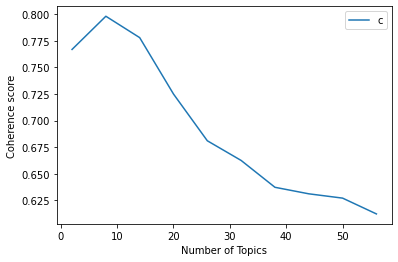

In [67]:
start,stop,step=2,60,6
model_list_lsa, coherence_values_lsa = compute_coherence_values_lsi(idtoword, corpus,after_le,stop, start, step)
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [68]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values_lsa):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

Num Topics: 2  - Coherence Value: 0.5389
Num Topics: 8  - Coherence Value: 0.5144
Num Topics: 14  - Coherence Value: 0.532
Num Topics: 20  - Coherence Value: 0.5392
Num Topics: 26  - Coherence Value: 0.5281
Num Topics: 32  - Coherence Value: 0.5357
Num Topics: 38  - Coherence Value: 0.5364
Num Topics: 44  - Coherence Value: 0.5254
Num Topics: 50  - Coherence Value: 0.5082
Num Topics: 56  - Coherence Value: 0.5348


In [69]:
#topics
pprint(lsamodel.print_topics())

[(0,
  '0.450*"move" + 0.422*"stop" + 0.389*"flay" + 0.389*"freedom" + '
  '0.389*"pension" + 0.389*"fighter" + 0.061*"evict" + 0.061*"squatter" + '
  '0.036*"power" + 0.033*"house"'),
 (1,
  '-0.524*"hold" + -0.460*"put" + -0.391*"ram" + -0.391*"tample" + '
  '-0.391*"message" + -0.097*"reform" + -0.077*"driver" + -0.076*"murder" + '
  '-0.069*"want" + -0.069*"track"'),
 (2,
  '-0.498*"traffic" + -0.430*"extra" + -0.430*"tourist" + -0.430*"bus" + '
  '-0.430*"clear" + -0.068*"statewide" + -0.068*"bjp" + -0.068*"block" + '
  '-0.000*"year" + -0.000*"ago"'),
 (3,
  '-0.493*"year" + -0.433*"apply" + -0.433*"claim" + -0.433*"passport" + '
  '-0.433*"ago" + -0.060*"good" + -0.060*"music" + 0.000*"traffic" + '
  '0.000*"tourist" + 0.000*"clear"'),
 (4,
  '0.447*"court" + 0.447*"krishna" + 0.447*"take" + 0.447*"state" + '
  '0.447*"may" + -0.000*"traffic" + -0.000*"extra" + -0.000*"tourist" + '
  '-0.000*"clear" + -0.000*"bus"'),
 (5,
  '0.707*"head" + 0.707*"unwante" + -0.000*"may" + -0.000

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)

LSA has lower accuracy than LDA.The Coherence value for optimal number of topics for LSA is 53 where as for LDA is 61. It can be seen that LDA is more accurate. Interpretability of topics is low for LSA.But we can easily interprete topics in LDA. LSA has less efficient representation.